In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

Ici on regarde les expériences effectués sur $n_{gen}=200$ aprés avoir corrigé un bug où les sorties de cellules n'étaient pas forcément dans $[-1;1]$, ce qui empêchait l'utilisation de certaines fonctions. On remarque d'abord que l'utilisation d'une fonction trigonométrique n'est pas efficace sur un probléme multi-tâche, ce qui est inattendu. On regarde donc l'effet de $cos$, il faudrait regarder l'effet de $tanh$. Enfin on vérifie que la correction du bug n'a pas altéré les performances de l'algorithme.

In [3]:
data = pd.read_csv("../logs/2020-11-06T16:01:47.069.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])

In [4]:
m=data.shape[0]

In [5]:
cent=[[],[],[]]
fros=[[],[],[]]
pacm=[[],[],[]]

In [6]:
for i in range(m//3):
    x=data[data["Num"]==i+1].values
    cent[0].append(x[0][4])
    cent[1].append(x[0][5])
    cent[2].append(x[0][6])
    fros[0].append(x[1][4])
    fros[1].append(x[1][5])
    fros[2].append(x[1][6])
    pacm[0].append(x[2][4])
    pacm[1].append(x[2][5])
    pacm[2].append(x[2][6])
    

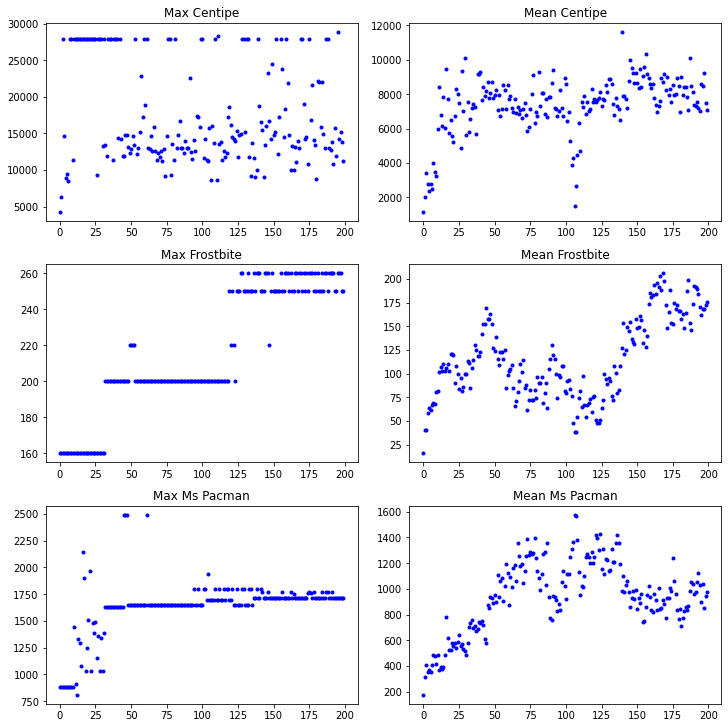

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10),constrained_layout=True)
ax[0,0].plot(cent[0],'b.')
ax[0,1].plot(cent[1],'b.')
ax[1,0].plot(fros[0],'b.')
ax[1,1].plot(fros[1],'b.')
ax[2,0].plot(pacm[0],'b.')
ax[2,1].plot(pacm[1],'b.')
names=["Centipe","Frostbite","Ms Pacman"]
for i in range(3):
    ax[i,0].set_title("Max "+names[i])
    ax[i,1].set_title("Mean "+names[i])

On voit que l'apprentissage selon FrostBite n'est pas effiace, ce qui nous fait reculer par rapport aux performances précédement acquises. On peut donc faire l'hypothése que les fonction trigonométriques ne sont pas performantes pour un apprentissage multi-tâche.

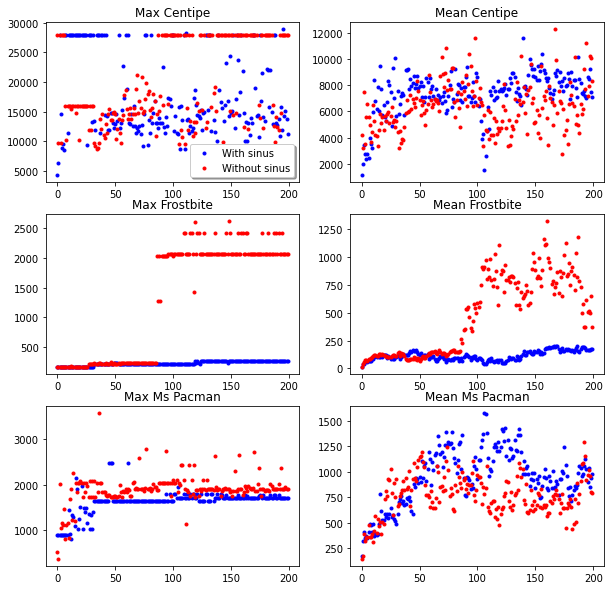

In [16]:
data2 = pd.read_csv("../logs/2020-11-07T08:30:55.754.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])
m2=data2.shape[0]
cent2=[[],[],[]]
fros2=[[],[],[]]
pacm2=[[],[],[]]
for i in range(m2//3):
    x=data2[data2["Num"]==i+1].values
    cent2[0].append(x[0][4])
    cent2[1].append(x[0][5])
    cent2[2].append(x[0][6])
    fros2[0].append(x[1][4])
    fros2[1].append(x[1][5])
    fros2[2].append(x[1][6])
    pacm2[0].append(x[2][4])
    pacm2[1].append(x[2][5])
    pacm2[2].append(x[2][6])

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].plot(cent[0],'b.')
ax[0,1].plot(cent[1],'b.')
ax[1,0].plot(fros[0],'b.')
ax[1,1].plot(fros[1],'b.')
ax[2,0].plot(pacm[0],'b.')
ax[2,1].plot(pacm[1],'b.')
ax[0,0].plot(cent2[0],'r.')
ax[0,1].plot(cent2[1],'r.')
ax[1,0].plot(fros2[0],'r.')
ax[1,1].plot(fros2[1],'r.')
ax[2,0].plot(pacm2[0],'r.')
ax[2,1].plot(pacm2[1],'r.')
ax[0,0].legend(('With sinus', 'Without sinus'), loc='lower right', shadow=True)
names=["Centipe","Frostbite","Ms Pacman"]
for i in range(3):
    ax[i,0].set_title("Max "+names[i])
    ax[i,1].set_title("Mean "+names[i])

En moyenne la différence entre avec ou sans fonction trigonométrique n'est pas flagrante (sauf sur FrostBite). Cependant on voit bien la différence sur les élites principalement avec Frostbite.
Il est cependant impératif de corriger le bug sur la sauvegarde d'élites. Regardons maintenant l'effet de la correction sur l'apprentissage lorsqu'il n'y a aucune fonction trigonométrique (les fonctions trigonométriques ne supportent pas le bug).

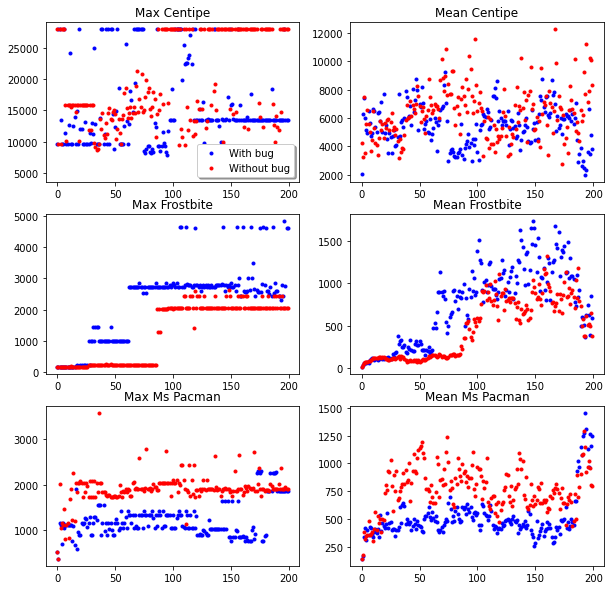

In [18]:
data3 = pd.read_csv("../logs/2020-11-06T23:05:39.681.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])
m3=data2.shape[0]
cent3=[[],[],[]]
fros3=[[],[],[]]
pacm3=[[],[],[]]
for i in range(m3//3):
    x=data3[data3["Num"]==i+1].values
    cent3[0].append(x[0][4])
    cent3[1].append(x[0][5])
    cent3[2].append(x[0][6])
    fros3[0].append(x[1][4])
    fros3[1].append(x[1][5])
    fros3[2].append(x[1][6])
    pacm3[0].append(x[2][4])
    pacm3[1].append(x[2][5])
    pacm3[2].append(x[2][6])

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].plot(cent3[0],'b.')
ax[0,1].plot(cent3[1],'b.')
ax[1,0].plot(fros3[0],'b.')
ax[1,1].plot(fros3[1],'b.')
ax[2,0].plot(pacm3[0],'b.')
ax[2,1].plot(pacm3[1],'b.')
ax[0,0].plot(cent2[0],'r.')
ax[0,1].plot(cent2[1],'r.')
ax[1,0].plot(fros2[0],'r.')
ax[1,1].plot(fros2[1],'r.')
ax[2,0].plot(pacm2[0],'r.')
ax[2,1].plot(pacm2[1],'r.')
ax[0,0].legend(('With bug', 'Without bug'), loc='lower right', shadow=True)
names=["Centipe","Frostbite","Ms Pacman"]
for i in range(3):
    ax[i,0].set_title("Max "+names[i])
    ax[i,1].set_title("Mean "+names[i])

La différence n'a rien de flagrante, les profils d'apprentissages sont similaires, il faudrait faire plusieurs expériences pour comparer l'apprentissage en moyenne. Mais dû au coût de calcul que çà demanderait çà ne semble pas nécessaire. Vérifions enfin si la fonction $cos$  est plus efficace que la fonction $sin$.

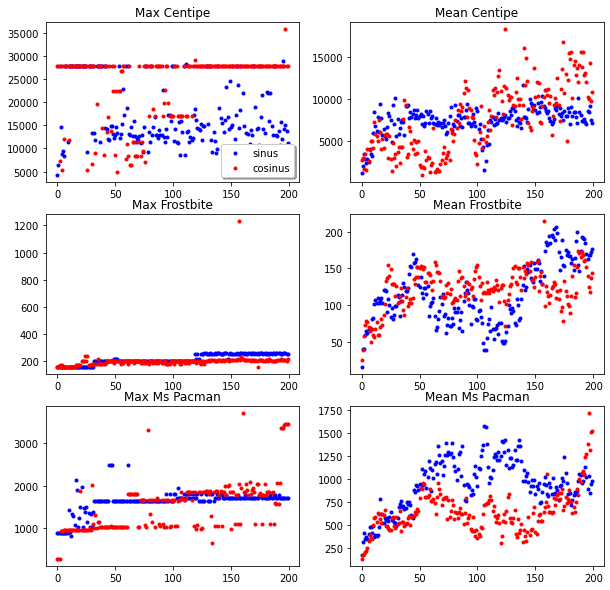

In [20]:
data4 = pd.read_csv("../logs/2020-11-12T11:58:17.589.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])
m4=data4.shape[0]
cent4=[[],[],[]]
fros4=[[],[],[]]
pacm4=[[],[],[]]
for i in range(m4//3):
    x=data4[data4["Num"]==i+1].values
    cent4[0].append(x[0][4])
    cent4[1].append(x[0][5])
    cent4[2].append(x[0][6])
    fros4[0].append(x[1][4])
    fros4[1].append(x[1][5])
    fros4[2].append(x[1][6])
    pacm4[0].append(x[2][4])
    pacm4[1].append(x[2][5])
    pacm4[2].append(x[2][6])

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].plot(cent[0],'b.')
ax[0,1].plot(cent[1],'b.')
ax[1,0].plot(fros[0],'b.')
ax[1,1].plot(fros[1],'b.')
ax[2,0].plot(pacm[0],'b.')
ax[2,1].plot(pacm[1],'b.')
ax[0,0].plot(cent4[0],'r.')
ax[0,1].plot(cent4[1],'r.')
ax[1,0].plot(fros4[0],'r.')
ax[1,1].plot(fros4[1],'r.')
ax[2,0].plot(pacm4[0],'r.')
ax[2,1].plot(pacm4[1],'r.')
ax[0,0].legend(('sinus', 'cosinus'), loc='lower right', shadow=True)
names=["Centipe","Frostbite","Ms Pacman"]
for i in range(3):
    ax[i,0].set_title("Max "+names[i])
    ax[i,1].set_title("Mean "+names[i])

Les élites semblent un peu mieux avec la fonction cosinus mais le bug sur la sauvegarde des élites ne permet pas de conclure sur une différence significative ou non. Quoi qu'il en soit il n'y a pas de différence flagrante sur frostbite, l'élite obtenue avec la fonction cosinus aurait trés bien pu être obtenue avec un sinus? C'est une question qu'il faudra creuser aprés la correction du bug.